This is a script to look at vertical diffusion mover in the mixed layer with and without a rise velocity. A bunch more info about the vertical diffusion algorithm and some comparisons with the old GNOME algorithm can be found here:
https://trac.orr.noaa.gov/trac/GNOME-ADIOS/wiki/AlgorithmDevelopment

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from datetime import datetime, timedelta

import numpy as np
mod
from gnome.spill.elements import plume
from gnome.utilities.distributions import UniformDistribution

from gnome.model import Model
from gnome.map import GnomeMap
from gnome.spill import point_line_release_spill
from gnome.movers import (
                          RiseVelocityMover,
                          RandomVerticalMover,
                          )

def make_model(rise_vel):

    print 'initializing the model'
    start_time = datetime(2015, 8, 1, 0, 0)
    model = Model(start_time=start_time, duration=timedelta(days=5),
                  time_step=5 * 60, uncertain=False)
    
    print 'adding the map'
    model.map = GnomeMap()
    
    print 'adding spill'
    # I use a uniform distribution with the same high/low values to get one size of droplets (50 microns)
    ud = UniformDistribution(low=50e-6,high=50e-6)
    spill = point_line_release_spill(num_elements=1000,
                                     amount=90,  # default volume_units=m^3
                                     units='m^3',
                                     start_position=(0, 0,
                                                     5),
                                     release_time=start_time,    
                                     element_type=plume(distribution=ud,substance_name='ALASKA NORTH SLOPE (MIDDLE PIPELINE)')
                                     )
    model.spills += spill

    # print 'adding a RiseVelocityMover:'
    if rise_vel:
        model.movers += RiseVelocityMover()

    # print 'adding a RandomVerticalMover:'
    model.movers += RandomVerticalMover(vertical_diffusion_coef_above_ml=50,
                                        vertical_diffusion_coef_below_ml=.11,
                                        mixed_layer_depth=10)

    return model


initializing the model
adding the map
adding spill


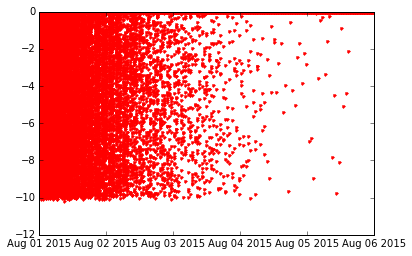

In [15]:
# With RISE velocity (50 micron droplet)
model = make_model(rise_vel=True)
t = np.empty((model.num_time_steps,1000),datetime)
depths = np.empty((model.num_time_steps,1000),)
for i,step in enumerate(model):
    t[i,:] = [model.model_time] * 1000
    sc = model.spills.items()[0]
    pos = sc['positions']
    depths[i,:] = -1*pos[:,2]

plt.plot(t[::10],depths[::10],'r.')
plt.show()

initializing the model
adding the map
adding spill


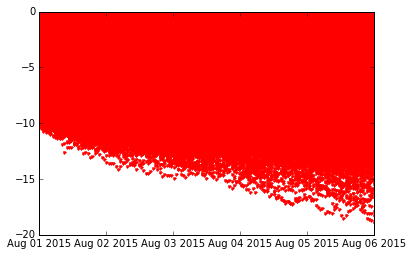

In [16]:
# No rise velocity
model = make_model(rise_vel=False)
t = np.empty((model.num_time_steps,1000),datetime)
depths = np.empty((model.num_time_steps,1000),)
for i,step in enumerate(model):
    t[i,:] = [model.model_time] * 1000
    sc = model.spills.items()[0]
    pos = sc['positions']
    depths[i,:] = -1*pos[:,2]

plt.plot(t[::10],depths[::10],'r.')
plt.show()